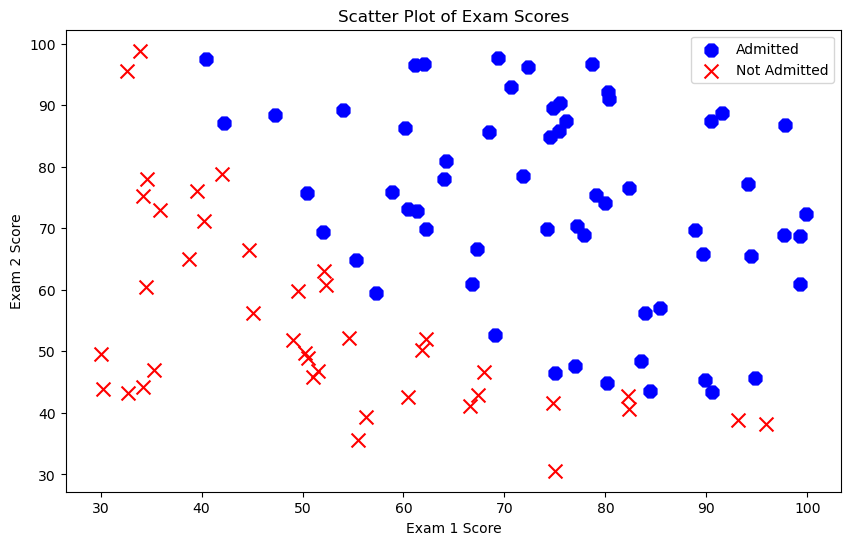

All tests passed!
All tests passed!
Initial Cost Passed
Custom Cost Passed
All tests passed!
All tests passed!
Final cost: 0.30186822231814514
All tests passed!
Accuracy on the training set: 92.00%


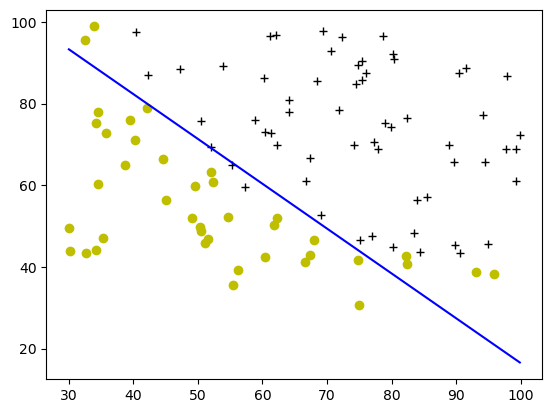

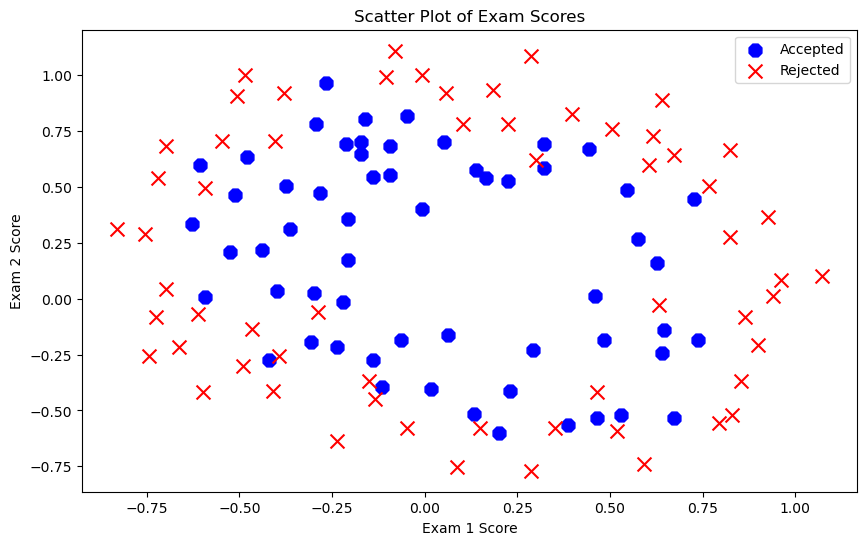

All tests passed!
All tests passed!
Final cost: 0.44911111158137196
Accuracy on the training set: 83.05%


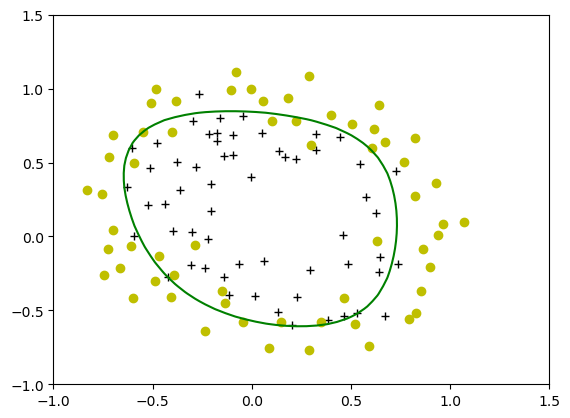

In [1]:

import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import logistic_reg
from logistic_reg import sigmoid
from logistic_reg import compute_cost
from logistic_reg import compute_gradient
from logistic_reg import gradient_descent
from logistic_reg import compute_cost_reg
from logistic_reg import compute_gradient_reg
from logistic_reg import predict
from  public_tests import sigmoid_test
from public_tests import compute_cost_test
from  public_tests import predict_test
from  public_tests import compute_gradient_test
from public_tests import compute_cost_reg_test
from public_tests import compute_gradient_reg_test
from utils import plot_decision_boundary
from utils import plot_data
from utils import map_feature


def plot_data(X, y, pos_label="Admitted", neg_label="Not Admitted"):
    # Divide los datos en positivos y negativos
    positive = y == 1
    negative = y == 0
    
    # Crea un gráfico de dispersión con marcadores personalizados
    plt.figure(figsize=(10, 6))
    plt.scatter(X[positive, 0], X[positive, 1], marker='8', color='b', s=100, label=pos_label)
    plt.scatter(X[negative, 0], X[negative, 1], marker='x', color='r', s=100, label=neg_label)
    
    # Agrega etiquetas a los ejes y un título
    plt.xlabel("Exam 1 Score")
    plt.ylabel("Exam 2 Score")
    plt.title("Scatter Plot of Exam Scores")
    
    # Agrega una leyenda
    plt.legend(loc='upper right')
    
    # Muestra el gráfico
    plt.show()


    
# Cargar datos desde el archivo
data = np.loadtxt('data/ex2data1.txt', delimiter=',')

# Separar los datos en características (X) y etiquetas (y)
X = data[:, :-1]  # Características
y = data[:, -1]   # Etiquetas
# Llamar a la función plot_data con tus datos X e y
plot_data(X, y)

values = np.array([-1, 0, 1, 2])
sigmoid_values = sigmoid(values)
sigmoid_test(sigmoid)






compute_cost_test(compute_cost)
# Supongamos que tienes tus datos X y y, así como los valores de w y b
w_initial = np.zeros((X.shape[1], 1))
b_initial = 0
cost_initial = compute_cost(X, y, w_initial, b_initial)
if np.isclose(cost_initial, 0.693147, rtol=1e-4):
    print("Initial Cost Passed")
else:
    print(cost_initial)

w_custom = np.array([0.2, 0.2])
b_custom = -24
cost_custom = compute_cost(X, y, w_custom, b_custom)
if np.isclose(cost_custom, 0.218330193826, rtol=1e-4):
    print("Custom Cost Passed")
else:

    print(cost_custom)
compute_cost_test(compute_cost)




# Calcular el gradiente con los valores iniciales NO FUNCIONA
w_initial =  np.array([0, 0])
b_initial = 0
dj_db, dj_dw = compute_gradient(X, y, w_initial, b_initial)
##Por alguna razon este caso no funciona pero pasa los test y funciona el de abajo
# Valores personalizados para los parámetros w y b  FUNCIONA
w_custom = np.array([0.2, -0.5])
b_custom = -24

# Calcular el gradiente con valores personalizados
dj_db, dj_dw = compute_gradient(X, y, w_custom, b_custom)

compute_gradient_test(compute_gradient)


w_initial2 =  np.array([0, 0])
b_initial2 = -8
alpha = 0.001
num_iters = 10000
w_final, b_final, cost_history = gradient_descent(X, y, w_initial2, b_initial2, compute_cost, compute_gradient, alpha, num_iters)
final_cost = compute_cost(X, y, w_final, b_final)
print("Final cost:", final_cost)


plot_decision_boundary(X,y,w_final,b_final)
predict_test(predict)

# Obtener las etiquetas predichas por el modelo
y_pred = predict(X, w_final, b_final)

# Calcular la precisión
accuracy = np.mean(y_pred == y) * 100.0

print(f"Accuracy on the training set: {accuracy:.2f}%")



##---------------------------

# Cargar datos desde el archivo
data = np.loadtxt('data/ex2data2.txt', delimiter=',')
X1 = data[:, 0]  # Primera característica original
X2 = data[:, 1]  # Segunda característica original
y = data[:, -1]   # Etiquetas


# Aplicar el mapeo de características a grado 6
X_mapped = map_feature(X1, X2, degree=6)



# Ahora puedes usar plot_data para visualizar los datos
plot_data(X_mapped, y, pos_label="Accepted", neg_label="Rejected")

compute_cost_reg_test(compute_cost_reg);
compute_gradient_reg_test(compute_gradient_reg)



X1 = data[:, 0]  # Primera característica original
X2 = data[:, 1]  # Segunda característica original
y = data[:, -1]   # Etiquetas
X_mapped = map_feature(X1, X2, degree=6)
w_initial3 = np.zeros(27)
b_initial3 = 1
alpha = 0.01
num_iters = 10000
w_final, b_final, cost_history = gradient_descent(X_mapped, y, w_initial3, b_initial3, compute_cost_reg, compute_gradient_reg, alpha, num_iters,0.01)
final_cost = compute_cost_reg(X_mapped, y, w_final, b_final,0.01)
print("Final cost:", final_cost)
# plot_decision_boundary(X_mapped,y,w_final,b_final)
# Obtener las etiquetas predichas por el modelo
y_pred = predict(X_mapped, w_final, b_final)

# Calcular la precisión
accuracy = np.mean(y_pred == y) * 100.0

print(f"Accuracy on the training set: {accuracy:.2f}%")


plot_decision_boundary(X_mapped,y,w_final,b_final)

